# Исследование оттока клиентов банка "Метанпромбанк"

Наш заказчик - отдел маркетинга банка «Метанпромбанк». Менеджеру нужна информация о имеющейся проблеме оттока клиентов. Информация должна максимально эффективно выделить сегменты отточных клиентов, чтобы они были однородными, высокоотточными и покрывали максимум проблемных зон банка. Ранее такое исследование проводилось, но результаты устарели. 

Конечная цель исследования: подготовить варианты маркетингового воздействия для уменьшения оттока клиентов.

В нашем распоряжении датасет с данными клиентов. Проведем исследование и выявим проблемные места. 

*Ссылка на презентацию:*

***https://disk.yandex.ru/i/2bpm85vijChQlA*** 

*Ссылка на дашборд:*

***https://public.tableau.com/app/profile/kisik12/viz/YA_PR_bank_churn_Kruglov/Dashboard1?publish=yes*** 

## Подготовка данных к анализу 

В данном блоке будет произведена загрузка датасета, приведение данных к рабочему виду (проверка пропусков и типов данных, приведение названий столбцов к нижнему регистру если потребуется), так же посмотрим общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import plotly.express as px
import numpy as np
from scipy import stats as st

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.max_colwidth = 150

In [2]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/bank_dataset.csv')
df.head(10)

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0
5,15616748,645,Рыбинск,М,44,8,113755.78,2,1,0,149756.71,1
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,10062.80,0
7,15698884,376,Ростов Великий,Ж,29,4,115046.74,4,1,0,119346.88,1
8,15835101,501,Ярославль,М,44,4,142051.07,2,0,1,74940.50,0
9,15635125,684,Ярославль,М,27,2,134603.88,1,1,1,71725.73,0


Данные:
- userid — идентификатор пользователя,
- score — баллы кредитного скоринга,
- City — город,
- Gender — пол,
- Age — возраст,
- Objects — количество объектов в собственности
- Balance — баланс на счёте,
- Products — количество продуктов, которыми пользуется клиент,
- CreditCard — есть ли кредитная карта,
- Loyalty — был ли клиент активен последнее время,
- estimated_salary — оценочная заработная плата клиента
- Churn — уходит или не уходит клиент

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Типы данных верные. Приведем названия столбцов к нижнему регистру, проверим наличие пропусков и дубликатов.

In [4]:
df.columns = df.columns.str.lower()
df.rename(columns = {'userid':'user_id', 'creditcard':'credit_card'}, inplace = True)
print('Количество пропусков: ', '\n', df.isna().sum())
print('\t')
print('Количество явных дубликатов:', df.duplicated().sum())
df.describe()

Количество пропусков:  
 user_id                0
score                  0
city                   0
gender                 0
age                    0
objects                0
balance             3617
products               0
credit_card            0
loyalty                0
estimated_salary       0
churn                  0
dtype: int64
	
Количество явных дубликатов: 0


,user_id,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,6383.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.573368e+07,650.528800,38.921800,5.012800,119827.493793,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,30095.056462,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.560844e+07,350.000000,18.000000,0.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.567126e+07,584.000000,32.000000,3.000000,100181.975000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.573347e+07,652.000000,37.000000,5.000000,119839.690000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.579597e+07,718.000000,44.000000,7.000000,139512.290000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.585843e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Хорошие данные:
- Баллы кредитного скоринга лежат в пределах 350 - 850
- Возраст клиентов банка от 18 до 92 лет, хоть 92 года это много, ничто не мешает клиенту быть клиентом
- Количество объектов в собственности от 0 до 10
- Баланс от 3768 руб. до 250898 руб
- Минимальное и максимальное количество банковских продуктов 1 и 4 соответственно

Требует внимания:
- средний заработок клиента. Он лежит в пределах 11.58 руб - 199992 руб. Так как данная графа лишь оценочная, то была заполненна предположительно средними данными. Так же,скорее всего здесь есть студенты университетов и колледжей. По данным из интернета, минимальная стипендия студентов колледжей составляет 638 руб. Но даже при учете этих данных, нельзя изменять имеющиеся данные.

В столбце "баланс" присутсвуют 3617 пропусков. Так как минимальное значение в графе баланс составляет 3768.69, можно сделать вывод, что пропуски могут быть обоснованы отсутсвием средств на счете. Так же возможно что клиент пользуется исключительно кредитной картой, либо закрыл счета так как больше не хочет пользоваться услугами банка. 

Создадим два датасета, в первый включим только клиентов с пропуском в графе баланс, во второй всех остальных. На основе данных, полученных сравнением датасетов, постараемся найти причину пропусков и выясним что с ними делать.

In [5]:
df_null = df[df['balance'].isnull()]
display(df_null.describe())

df_not_null = df[df['balance'].notnull()]
display(df_not_null.describe())

,user_id,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
count,3.617000e+03,3617.000000,3617.000000,3617.000000,0.0,3617.000000,3617.000000,3617.000000,3617.000000,3617.000000
mean,1.573469e+07,649.452861,38.434891,5.071330,NaN,1.784628,0.716616,0.517832,98983.559549,0.138236
std,7.194749e+04,96.158798,10.492002,2.860781,NaN,0.496455,0.450704,0.499751,57730.828955,0.345195
min,1.560844e+07,350.000000,18.000000,0.000000,NaN,1.000000,0.000000,0.000000,90.070000,0.000000
25%,1.567226e+07,583.000000,31.000000,3.000000,NaN,1.000000,0.000000,0.000000,49506.820000,0.000000
50%,1.573608e+07,651.000000,37.000000,5.000000,NaN,2.000000,1.000000,1.000000,98618.790000,0.000000
75%,1.579629e+07,717.000000,43.000000,7.000000,NaN,2.000000,1.000000,1.000000,148330.970000,0.000000
max,1.585810e+07,850.000000,88.000000,10.000000,NaN,4.000000,1.000000,1.000000,199992.480000,1.000000


,user_id,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
count,6.383000e+03,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000
mean,1.573310e+07,651.138493,39.197713,4.979633,119827.493793,1.386025,0.699201,0.513552,100717.352956,0.240796
std,7.192913e+04,96.934609,10.476208,2.909514,30095.056462,0.577011,0.458641,0.499855,57380.316584,0.427600
min,1.560844e+07,350.000000,18.000000,0.000000,3768.690000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1.567094e+07,584.000000,32.000000,2.000000,100181.975000,1.000000,0.000000,0.000000,51736.850000,0.000000
50%,1.573226e+07,652.000000,38.000000,5.000000,119839.690000,1.000000,1.000000,1.000000,101139.300000,0.000000
75%,1.579584e+07,718.000000,44.000000,8.000000,139512.290000,2.000000,1.000000,1.000000,149596.615000,0.000000
max,1.585843e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199970.740000,1.000000


В подавляющем большинстве средние показатели для двух датасетов равны. Интересно лишь что процент уходящих клиентов, среди тех, у кого не нулевой баланс, почти в 2 раза выше чем у "безбалансников".

Посмотрим на категориальные показатели.

In [6]:
print('Города клиентов с пропусками баланса:')
display(df_null['city'].value_counts())

print('Города клиентов без пропусков баланса:')
display(df_not_null['city'].value_counts())

print('Пол клиентов с пропусками баланса:')
display(df_null['gender'].value_counts())

print('Пол клиентов без пропусков баланса:')
display(df_not_null['gender'].value_counts())

Города клиентов с пропусками баланса:


Ярославль    2418
Рыбинск      1199
Name: city, dtype: int64

Города клиентов без пропусков баланса:


Ярославль         2596
Ростов Великий    2509
Рыбинск           1278
Name: city, dtype: int64

Пол клиентов с пропусками баланса:


М    1963
Ж    1654
Name: gender, dtype: int64

Пол клиентов без пропусков баланса:


М    3494
Ж    2889
Name: gender, dtype: int64

Из городов Ярославль и Рыбинск количество клиентов очень близко друг к другу. В то же время в Ростове Великом, у всех клиентов отсутсвуют пропуски в балансе. Разделение клиентов по половому признаку, с условием пропуска в графе баланс, в соотношении к общему числу, равно.

В сухом остатке получаем, что в городах Ярославль и Рыбинск почти у половины клиентов нет данных о балансе. В данный момент оставим основной датасет без изменений, пропуски относятся к категориям **MAR** (Missing At Random) либо **MNAR** (Missing Not At Random) и замена на медианные значения либо 0 иссказит результат.

**ВЫВОД:** по результатам предобработки данных:
- проверили типы данных
- привели к нижнему регистру названия столбцов
- проверили дубликаты
- провели проверку данных на "нормальность"
- выявили 3617 пропусков в данных о балансе (на данный момент принято решение не заполнять пропуски)

## Проведение исследовательского анализа данных 

Посмотрим на данные более конкретно: 
- Построим матрицу корреляции 
- Составим портреты клиентов 
- Для визуализации данных будем использовать боксплоты, гистограммы и хитмапы. 

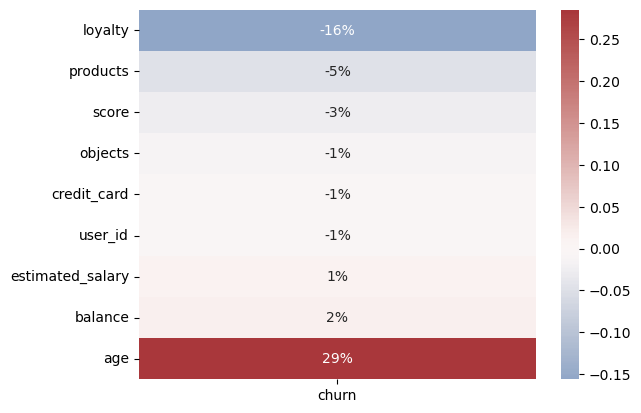

In [7]:
corr = df.corr()
sns.heatmap(corr.loc[:,['churn']].drop('churn').sort_values('churn'), annot=True, fmt=".0%", cmap="vlag", center=0);

Для оценки силы связи корреляции, применяется шкала Чеддока, где уровень корреляции равен: 
- слабая — от 0,1 до 0,3
- умеренная — от 0,3 до 0,5
- заметная — от 0,5 до 0,7
- высокая — от 0,7 до 0,9
- весьма высокая (сильная) — от 0,9 до 1,0.

По матрице корреляции, зависимость наблюдается между возрастом и оттоком клиентов (0.29) и активностью с оттоком (0.16). Оба показателя попадают в уровень **слабой** корреляции.

Наша главная цель - анализ оттока клиентов, так что сконцентриеумся на ней. Первым делом посмотрим на доли оттока клиентов в зависимости от разных показателей.

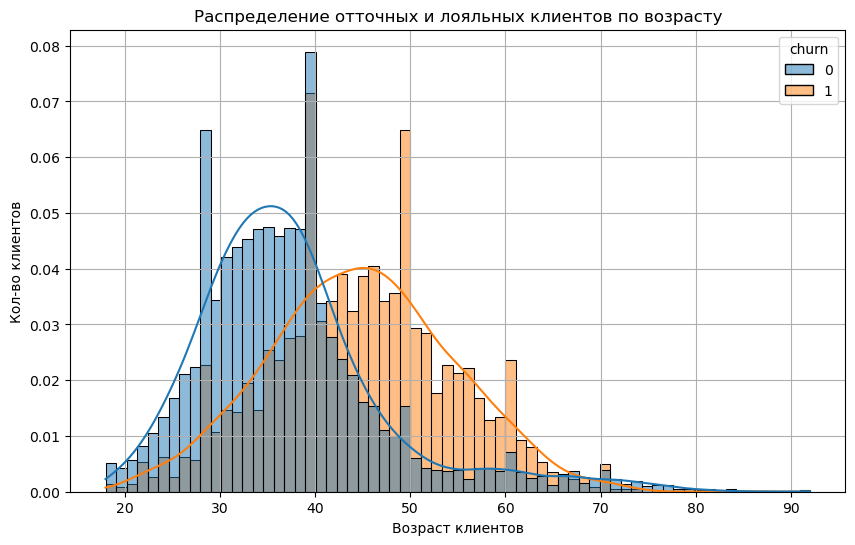

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', kde=True, hue='churn', stat='density', common_norm=False)
plt.grid(True)
plt.title('Распределение отточных и лояльных клиентов по возрасту')
plt.xlabel('Возраст клиентов')
plt.ylabel('Кол-во клиентов')
None

Пик лояльных клиентов приходится на 30-40 лет, пик отточных на 40-50. В общем основная масса клиентов приходится на возраст 25-45 лет.


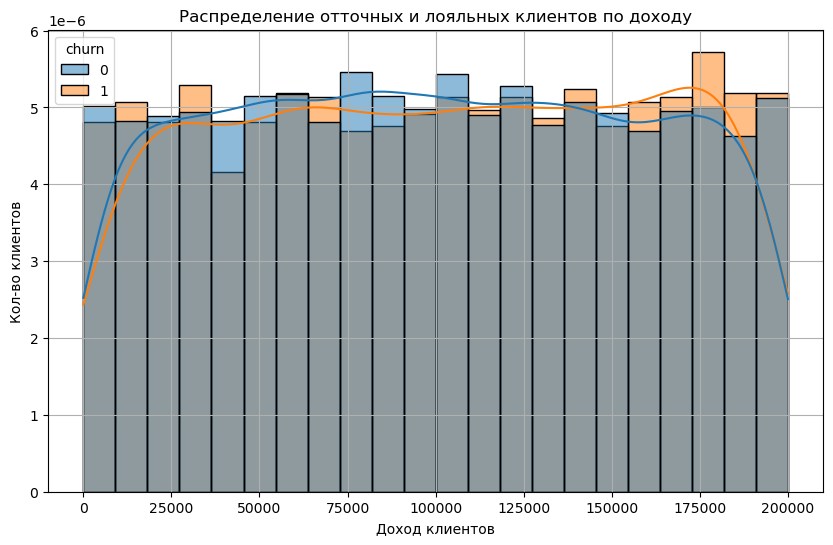

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='estimated_salary', kde=True, hue='churn', stat='density', common_norm=False)
plt.grid(True)
plt.title('Распределение отточных и лояльных клиентов по доходу')
plt.xlabel('Доход клиентов')
plt.ylabel('Кол-во клиентов')
None

Судя по графику, доход клиентов никак не влияет на отточность. Так же распределен доход равномерно.

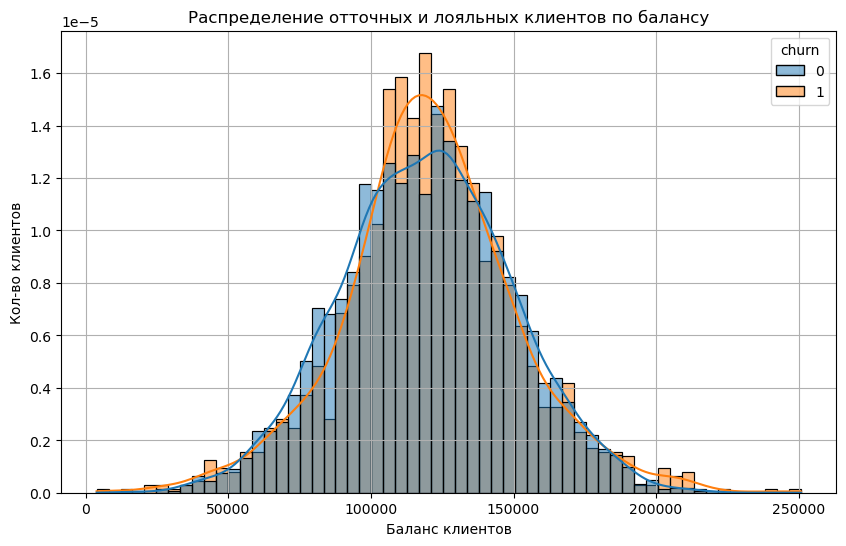

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='balance', kde=True, hue='churn', stat='density', common_norm=False)
plt.grid(True)
plt.title('Распределение отточных и лояльных клиентов по балансу')
plt.xlabel('Баланс клиентов')
plt.ylabel('Кол-во клиентов')
None

Тут так же как и с доходом, влияние баланса на отток не замечено. 

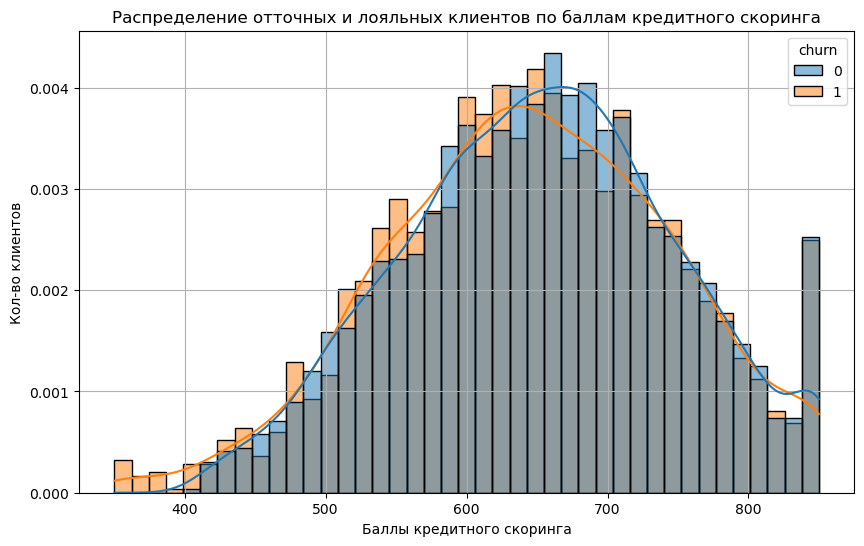

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='score', kde=True, hue='churn', stat='density', common_norm=False)
plt.grid(True)
plt.title('Распределение отточных и лояльных клиентов по баллам кредитного скоринга')
plt.xlabel('Баллы кредитного скоринга')
plt.ylabel('Кол-во клиентов')
None

С приближение к пиковому показателю кредитного скоринга вырастает лояльность клиентов. До 650 баллов преобладают отточные клиенты.


In [12]:
def plot(data, target_column):
    for col in data.columns.values.tolist()[2:]:
        with plt.style.context('ggplot'):
            chain_category = data.groupby([col, target_column]).agg({'user_id' : 'count'})
            chain_category = chain_category.reset_index()
            sns.set(rc={'figure.figsize':(11,6)})
            sns.barplot(data=chain_category, x=col, y='user_id', hue=target_column)
        plt.show()

Исспользуя заданную функцию, построим графики отношения разных групп клиентов к оттоку.

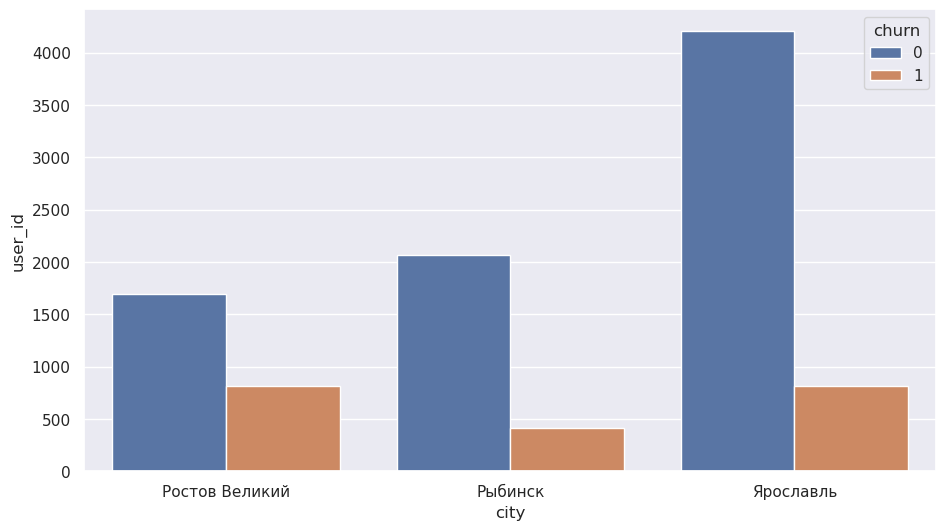

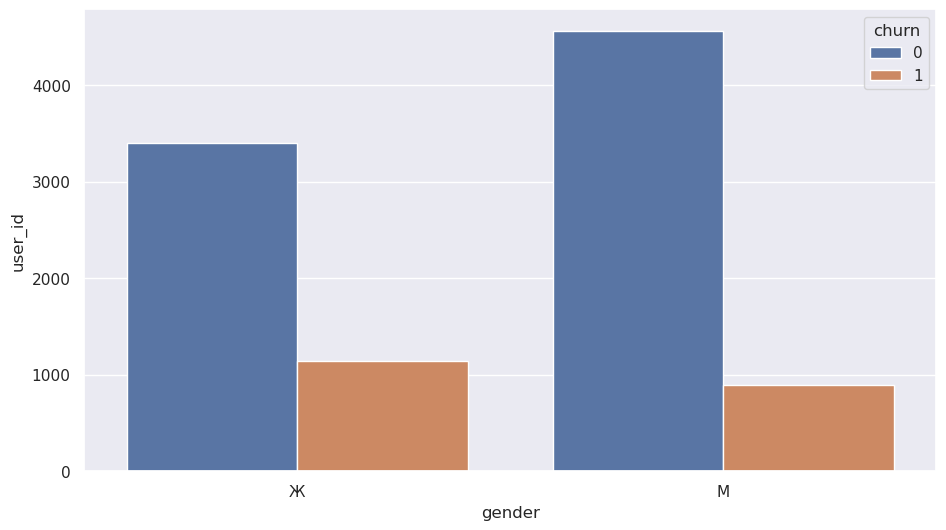

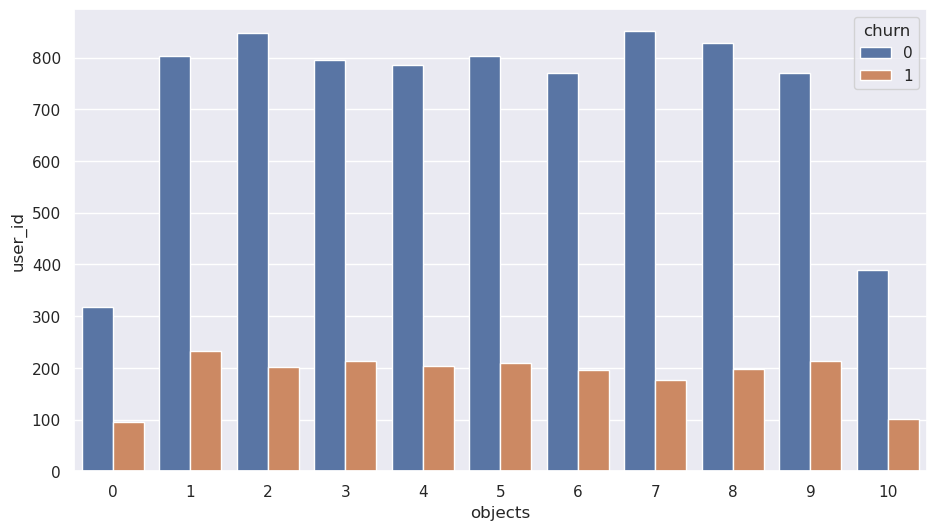

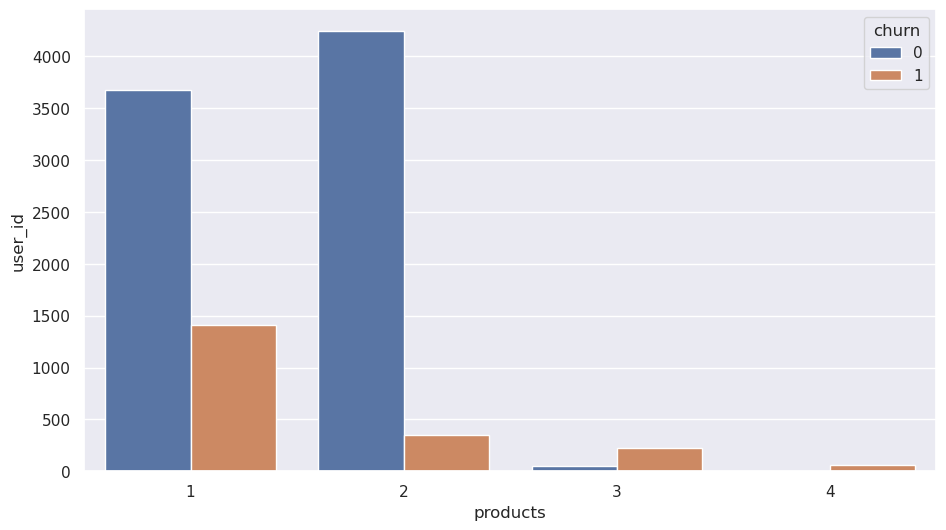

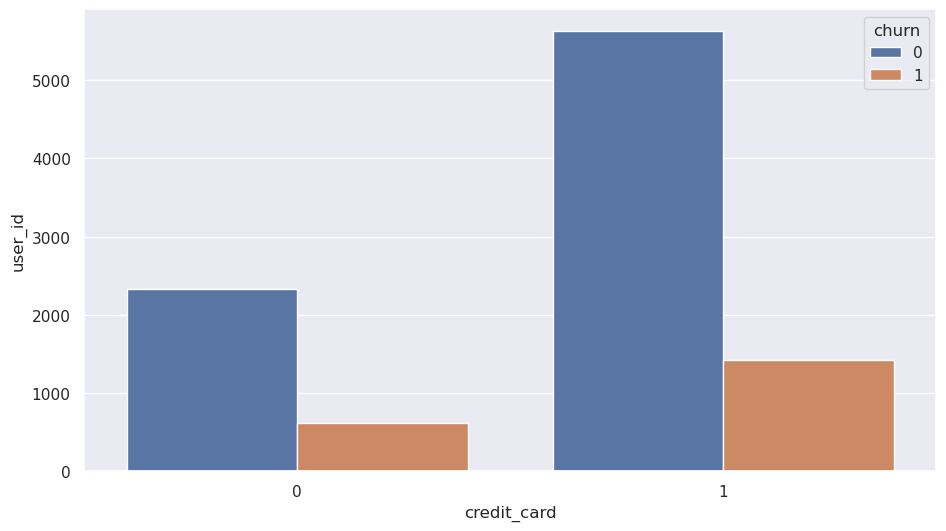

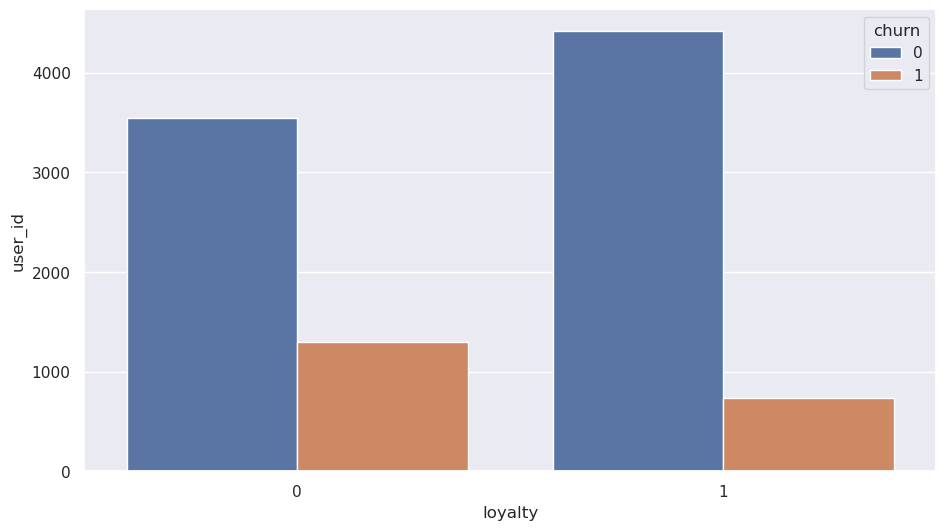

In [13]:
df1 = df[['churn'] + [x for x in df.columns if x != 'churn']]
df1 = df1.drop(columns = ['score', 'age', 'balance', 'estimated_salary'], axis = 1)
plot(df1, 'churn')

**Выводы по графикам:**
- по городам самый высокий отток клиентов в Ростове Великом и Ярославле, за одним лишь моментом, в Ярославле сильно больше клиентов.
- в численном измерении среди женщин отток немного выше. В процентном ощутимо выше.
- в общем и целом отток примерно равен вне зависимости от количества объектов в собственности у клиента.
- высокий отток у клиентов с 1 продуктом, и очень высокий у клиентов с 3 продуктами. Клиенты с 4 продуктами просто все ушли.
- среди владельцев кредитных карт отток выше, но и держателей карт больше.
- у неактивных клиентов, как и ожидалось, отток выше.
- пик лояльных клиентов приходится на 30-40 лет, пик отточных на 40-50. В общем основная масса клиентов приходится на возраст 25-45 лет
- доход клиентов никак не влияет на отточность
- влияние баланса на отток не замечено
- по графику явно виден пик оттока у клиентов с рейтингом от 600 до 700

Далее более конкретно, с цифрами. Так же разделим клиентов по категориям возраста, баланса, дохода и баллов кредитного скоринга.

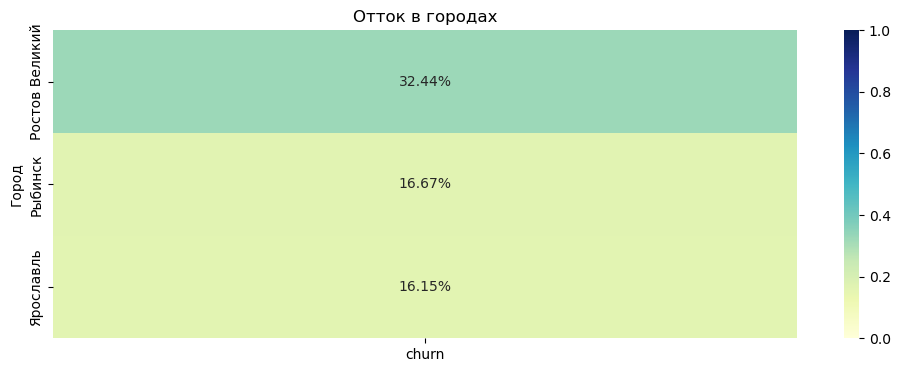

,city,count,mean,sum
0,Ростов Великий,2509,0.324432,814
1,Рыбинск,2477,0.166734,413
2,Ярославль,5014,0.161548,810


In [14]:
ax = df.pivot_table(index='city', values='churn', aggfunc='mean')
plt.figure(figsize=(12, 4))
sns.heatmap(ax, cmap='YlGnBu', annot=True, fmt='.2%',vmin=0, vmax=1)
plt.title('Отток в городах')
plt.ylabel('Город')
plt.show()
pd.pivot_table(df, index='city', values='churn', aggfunc=('mean','count', np.sum)).reset_index()

32 % клиентов уходит из банка в городе Ростов Великий (814 клиентов), также 810 клиентов уходит в городе Ярославль, что в свою очередь составляет 16 % от числа клиентов города. Также 16 % в Рыбинске.

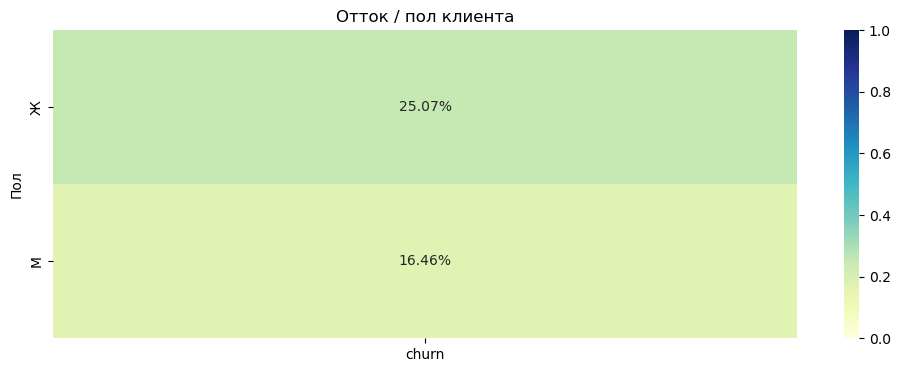

,gender,count,mean,sum
0,Ж,4543,0.250715,1139
1,М,5457,0.164559,898


In [15]:
ax = df.pivot_table(index='gender', values='churn', aggfunc='mean')
plt.figure(figsize=(12, 4))
sns.heatmap(ax, cmap='YlGnBu', annot=True, fmt='.2%',vmin=0, vmax=1)
plt.title('Отток / пол клиента')
plt.ylabel('Пол')
plt.show()
pd.pivot_table(df, index='gender', values='churn', aggfunc=('mean','count', np.sum)).reset_index()

Среди женщин отток выше, 25 % и 1139 клиентов против 16,5 % и 898 клиентов среди мужчин.

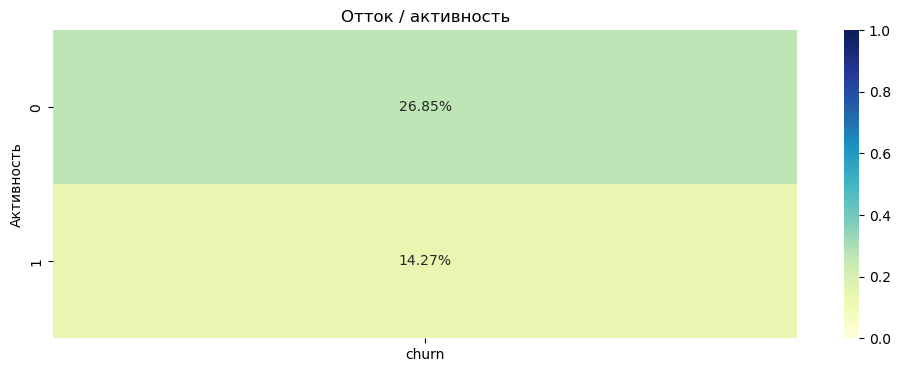

,loyalty,count,mean,sum
0,0,4849,0.268509,1302
1,1,5151,0.142691,735


In [16]:
ax = df.pivot_table(index='loyalty', values='churn', aggfunc='mean')
plt.figure(figsize=(12, 4))
sns.heatmap(ax, cmap='YlGnBu', annot=True, fmt='.2%',vmin=0, vmax=1)
plt.title('Отток / активность')
plt.ylabel('Активность')
plt.show()
pd.pivot_table(df, index='loyalty', values='churn', aggfunc=('mean','count', np.sum)).reset_index()

Распределение между активными и неактивными клиентами почти равно, однако отток среди неактивных клиентов превышает активных на 567 клиентов, 26,85 % против 14,27 %.

Для разделения на группы, обратимся к исследованным данным. Из них видно:
- кредитный скоринг
    - до 650 баллов отток превалирует
    - свыше 650 лояльность увеличивается

- Возраст на можно разделить на 3 группы:
    - 1 группа (до 40 лет), отток меньше
    - 2 группа (40 - 65 лет), отток высокий
    - 3 группа (65 и выше), отток средний, но проблемный

- Баланс разделим на 4 группы:
    - низкий баланс (до 100.000 руб.), отток слабый
    - ниже среднего (100.000 - 150.000 руб.), высокий отток
    - средний баланс (150.000 - 200.000 руб.), средний отток
    - высокий баланс (свыше 200.000 руб.), отток высокий

In [17]:
def score_group(row):
    score = row['score']
    if score <= 650:
        return 'плохой'   
    else:
        return 'хороший'
df['score_group'] = df.apply(score_group, axis = 1)

def age_group(row):
    type = row['age']
    if type < 40:
        return '1 группа'
    elif 40 <= type < 65:
        return '2 группа'
    else:
        return '3 группа'
df['age_group'] = df.apply(age_group, axis = 1)

def balance_group(row):
    score = row['balance']
    if score < 100000:
        return 'низкий баланс'
    elif 100000 <= score < 150000:
        return 'ниже среднего'
    elif 150000 <= score < 200000:
        return 'средний баланс'    
    elif score > 200000:
        return 'высокий баланс'
df['balance_group'] = df.apply(balance_group, axis = 1)

df.head()

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,score_group,age_group,balance_group
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1,плохой,2 группа,None
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,плохой,2 группа,низкий баланс
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,плохой,2 группа,средний баланс
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0,хороший,1 группа,None
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0,хороший,2 группа,ниже среднего


In [18]:
pd.pivot_table(df, index='balance_group', values='churn', aggfunc=('mean','count', np.sum)).reset_index()

,balance_group,count,mean,sum
0,высокий баланс,34,0.558824,19
1,ниже среднего,3830,0.257702,987
2,низкий баланс,1584,0.205808,326
3,средний баланс,935,0.219251,205


Самый высокий отток в группе с высоким балансом (свыше 200 т.р.) - 55,8 %.

In [19]:
pd.pivot_table(df, index='score_group', values='churn', aggfunc=('mean','count', np.sum)).reset_index()

,score_group,count,mean,sum
0,плохой,4937,0.214098,1057
1,хороший,5063,0.193561,980


Самый отточный - плохой рейтинг (до 650 баллов) 21,4 %, так же они впереди и по количеству отточных клиентов, их 1057.

In [20]:
pd.pivot_table(df, index='age_group', values='churn', aggfunc=('mean','count', np.sum)).reset_index()

,age_group,count,mean,sum
0,1 группа,5987,0.099716,597
1,2 группа,3731,0.374430,1397
2,3 группа,282,0.152482,43


Ужасные показатели во 2 возрастной группе. Большой отток клиентов в возрасте от 40до 65 лет, 37,4 %. Среди 1 группы (до 40 лет) самые лучшие показатели, 9,9 % оттока.

In [21]:
pd.pivot_table(df, index='objects', values='churn', aggfunc=('mean','count', np.sum)).reset_index()

,objects,count,mean,sum
0,0,413,0.230024,95
1,1,1035,0.224155,232
2,2,1048,0.191794,201
3,3,1009,0.211100,213
4,4,989,0.205258,203
5,5,1012,0.206522,209
6,6,967,0.202689,196
7,7,1028,0.172179,177
8,8,1025,0.192195,197
9,9,984,0.216463,213


Явной зависимости оттока от количества объектов не наблюдается. Лучшими показателями отмечу лишь клиентов с 7 объектами, процент 
оттока 17,2 %. Хуже всех себя показали клиенты без объектов в собственности (23 %). Все остальные группы в районе 20 %.

In [22]:
pd.pivot_table(df, index='products', values='churn', aggfunc=('mean','count', np.sum)).reset_index()

,products,count,mean,sum
0,1,5084,0.277144,1409
1,2,4590,0.075817,348
2,3,266,0.827068,220
3,4,60,1.000000,60


Как и говорилось выше, клиенты с 4 продуктами все ушли. 82,7 % клиентов с тремя объектами так же ушли из банка. Самый лучший процент у клиентов с 2 продуктами - 7,6 %.

In [23]:
pd.pivot_table(df, index='credit_card', values='churn', aggfunc=('mean','count', np.sum)).reset_index()

,credit_card,count,mean,sum
0,0,2945,0.208149,613
1,1,7055,0.201843,1424


В общем все ровно, по 20 % среди держателей карт и среди тех, у кого ее нет.

In [24]:
pd.pivot_table(df, index='loyalty', values='churn', aggfunc=('mean','count', np.sum)).reset_index()

,loyalty,count,mean,sum
0,0,4849,0.268509,1302
1,1,5151,0.142691,735


Логичный, закономерный результат. Клиенты не показывающие свою активность уходят чаще, а именно 26,8 % против 14,3 % у активных клиентов банка.

**Вывод:** как резюме можно выделить 2 портрета клиентов, самого надежного, и склонного к оттоку клиента. Начнем с позитивного, "наш" клиент это:
- мужчина в возрасте до 40 лет из города Рыбинск
- с хорошим баллом кредитного скорринга (выше 650)
- в собственности 7 объектов
- пользуется 2 продуктами банка
- в последнее время проявлял активность в банке
- с низким балансом на счету (до 100.000 руб)

Отточный портрет клиента:
- женщина в возрасте от 40 до 65 лет, проживающая в Ростове Великом
- низкий балл кредитного скорринга (до 650)
- в собственности нет объектов
- пользуется 3 или 4 продукта банка
- в последнее время не проявлял активности
- с высоким балансом на счету (свыше 200 т.р.)

## Проверка статистических гипотез

Выдвинуто 2 гипотезы:
- гипотеза различия дохода между теми клиентами, которые ушли и теми, которые остались 
- гипотеза различия кредитного скоринга между теми клиентами, которые ушли и теми, кто остался 

### Гипотеза №1

Для проведения т-теста, необходимо проверить три критерия:
- генеральные совокупности не должны зависеть друг от друга
- выборочные средние должны быть нормально распределены
- дисперсии рассматриваемых генеральных совокупностей должны быть равны.

In [25]:
df_0_churn = df.query('churn==0')
df_1_churn = df.query('churn==1')

Дисперсия неотточных клиентов: 3295401414.9183917
Дисперсия отточных клиентов: 3353848166.807016


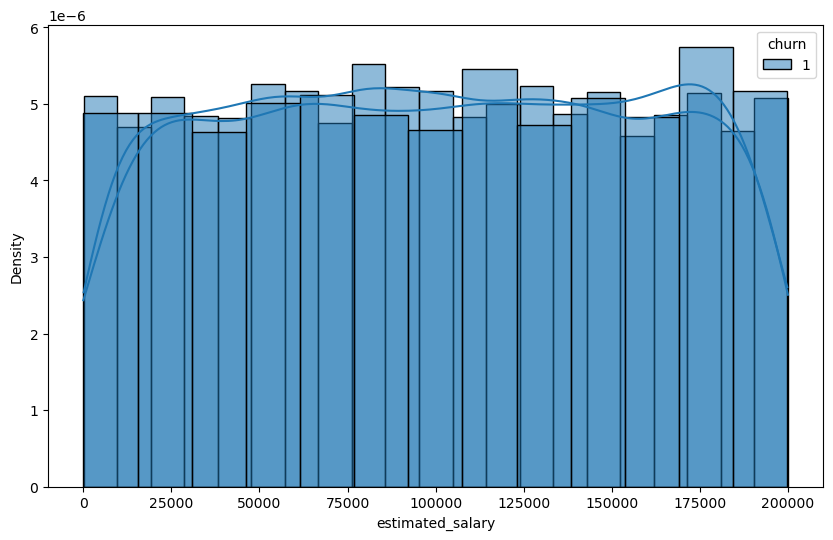

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_0_churn, x='estimated_salary', kde=True, hue='churn', stat='density', common_norm=False)
sns.histplot(data=df_1_churn, x='estimated_salary', kde=True, hue='churn', stat='density', common_norm=False)
None

print('Дисперсия неотточных клиентов:',df_0_churn['estimated_salary'].var())
print('Дисперсия отточных клиентов:',df_1_churn['estimated_salary'].var())

Далее вычислим эксцесс и асимметрию графиков. У нормального распределения, эталонными значениями эксцесса и ассиметрии являются 0 и 0 соответственно.

In [27]:
print('Асимметрия графика распределения лояльных клиентов', df_0_churn['estimated_salary'].skew(axis = 0, skipna = True))
print('Эксцесс графика распределения лояльных клиентов', df_0_churn['estimated_salary'].kurt(axis = 0))
print('Асимметрия графика распределения отточных клиентов', df_1_churn['estimated_salary'].skew(axis = 0, skipna = True))
print('Эксцесс графика распределения отточных клиентов', df_1_churn['estimated_salary'].kurt(axis = 0))

Асимметрия графика распределения лояльных клиентов 0.010995745639785868
Эксцесс графика распределения лояльных клиентов -1.1728361355886716
Асимметрия графика распределения отточных клиентов -0.03310390131791528
Эксцесс графика распределения отточных клиентов -1.2122752601944147


У обоих графиков асимметрия незначительна, а эксцесс говорит о плосковершинном распределении и ненормальности распределения.

In [28]:
results = st.shapiro(df_0_churn['estimated_salary'])
p_value = results[1]
print('p-значение: ', p_value)
if p_value < 0.05:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  3.8115318229635024e-43
Отвергаем нулевую гипотезу: распределение не нормально


C:\Users\crazy\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [29]:
results = st.shapiro(df_1_churn['estimated_salary'])
p_value = results[1]
print('p-значение: ', p_value)
if p_value < 0.05:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  4.592605209157659e-25
Отвергаем нулевую гипотезу: распределение не нормально


В обоих выборках данные распределены не нормально.

Из полученных данных понимаем что проведение t-теста нам не подойдет, будет проводить u-тест (непараметрический тест Уилкоксона-Манна-Уитни).

Формулировка гипотез:
- нулевая гипотеза (Н0) - между отточными клиентами и теми, кто остался, **НЕТ** различий дохода
- Альтернативная гипотеза (Н1) - между отточными клиентами и теми, кто остался, **ЕСТЬ** различия в доходах


Для проведения u-теста приняли уровень значимости равный 0.05.

In [30]:
results = st.mannwhitneyu(df_0_churn['estimated_salary'], df_1_churn['estimated_salary'])
print('p-значение: ', results.pvalue)
if results.pvalue < 0.05:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя') 

p-значение:  0.22705150930153783
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


Отвергнуть нулевую гипотезу не получилось. Как вывод: между отточными клиентами и теми, кто остался, **нет** различия дохода.

### Гипотеза №2

Сформулируем нулевую и альтернативную гипотезы:
- нулевая гипотеза (Н0) - кредитный скоринг отточных и лояльных клиентов **НЕ ИМЕЕТ** различий
- Альтернативная гипотеза (Н1) - кредитный скоринг отточных и лояльных клиентов **ИМЕЕТ** различия

Далее проверим нормальность распределения данных и равность дисперсий.

Дисперсия неотточных клиентов: 9149.656541843924
Дисперсия отточных клиентов: 10064.403893876843


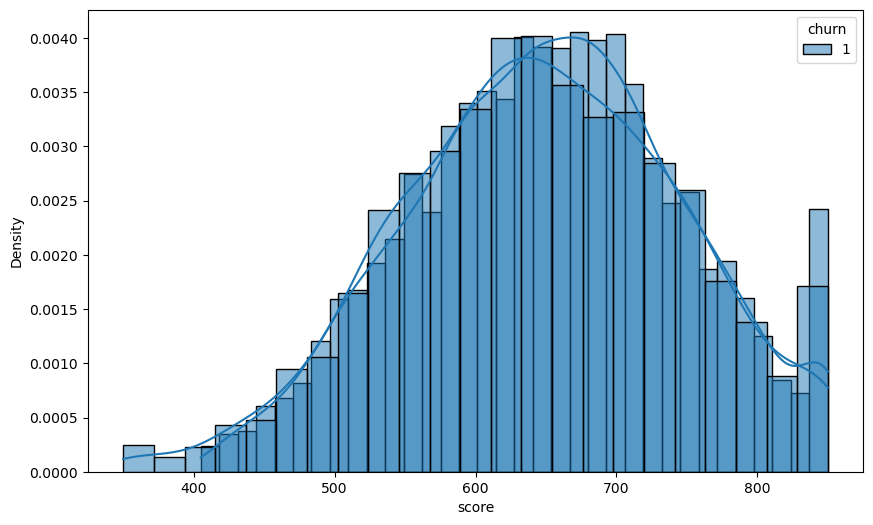

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_0_churn, x='score', kde=True, hue='churn', stat='density', common_norm=False)
sns.histplot(data=df_1_churn, x='score', kde=True, hue='churn', stat='density', common_norm=False)
None

print('Дисперсия неотточных клиентов:',df_0_churn['score'].var())
print('Дисперсия отточных клиентов:',df_1_churn['score'].var())

Данные распределены нормально, дисперсии равны.

Далее вычислим эксцесс и асимметрию графиков.

In [32]:
print('Асимметрия графика распределения лояльных клиентов', df_0_churn['score'].skew(axis = 0, skipna = True))
print('Эксцесс графика распределения лояльных клиентов', df_0_churn['score'].kurt(axis = 0))
print('Асимметрия графика распределения отточных клиентов', df_1_churn['score'].skew(axis = 0, skipna = True))
print('Эксцесс графика распределения отточных клиентов', df_1_churn['score'].kurt(axis = 0))

Асимметрия графика распределения лояльных клиентов -0.04701615897046344
Эксцесс графика распределения лояльных клиентов -0.4847315690341243
Асимметрия графика распределения отточных клиентов -0.14107821059531359
Эксцесс графика распределения отточных клиентов -0.27408409685535995


Тут также у обоих графиков асимметрия незначительна, а эксцессы более приближены к нормальному значению, но все равно не достаточно для вывода о нормальном распределении.

In [33]:
results = st.shapiro(df_0_churn['score'])
p_value = results[1]
print('p-значение: ', p_value)
if p_value < 0.05:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 
    
results = st.shapiro(df_1_churn['score'])
p_value = results[1]
print('p-значение: ', p_value)
if p_value < 0.05:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  1.5055403176682845e-19
Отвергаем нулевую гипотезу: распределение не нормально
p-значение:  1.2295591034217068e-07
Отвергаем нулевую гипотезу: распределение не нормально


C:\Users\crazy\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


В обоих выборках распределениее не нормально, принимаем u-тест.

In [34]:
results = st.mannwhitneyu(df_0_churn['score'], df_1_churn['score'])
print('p-значение: ', results.pvalue)
if results.pvalue < 0.05:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя') 

p-значение:  0.01986866117272834
Отвергаем нулевую гипотезу: разница статистически значима


По итогам теста, нулевая гипотеза отвергнута, следовательно: кредитный скоринг отточных и лояльных клиентов **ИМЕЕТ** различия.

## Сегментация клиентов банка

Основные характеристики влияющие на отток:
- возраст - 2 группа (40 - 65 лет) отток 37,4 %
- активность - неактивные клиенты, отток 26,8 %
- количество продуктов - 1 продукт, отток 27,7 %; 3 продукта, отток 82,7 %; 4 продукта, отток 100 %
- баллы кредитного скоринга - группа с плохим рейтингом, отток 21,4 %
- баланс клиента - ниже среднего (100 т.р. - 150 т.р), отток 25,7 %; высокий баланс (выше 200 т.р.), отток 55,8 %
- пол - отток среди женщин 25 %
- город - самый отточный город Ростов Великий (32,4 %)

Посчитаем среднебанковский отток.

In [35]:
print('Средний общий процент оттока по всем данным:', round(df['churn'].mean()*100,2), '%')

Средний общий процент оттока по всем данным: 20.37 %


Сегментируем клиентов на основе количества продуктов.

Так как в данных мало клиентов с 3 и 4 продуктами, объединим их в один сегмент.

In [36]:
#group1 = df.query('products == 1 & loyalty == 0 & gender == "Ж" & city == "Ростов Великий"')
#display(group1.describe())
#group1 = group1[['churn'] + [x for x in df.columns if x != 'churn']]
#group1 = group1.drop(columns = ['score', 'age', 'balance', 'estimated_salary', 'products'], axis = 1)
#plot(group1, 'churn')

**1 группа (373 клиента, отток 54,7 %.):** 
- клиенты с 1 продуктом
- женщины
- с низкой активностью 
- из города Ростов Великий

In [37]:
#group2 = df.query('products == 2 & gender == "Ж" & score_group == "плохой" & loyalty == 0 & age_group != "1 группа" & balance_group != "высокий баланс"')
#display(group2.describe())
#group2 = group2[['churn'] + [x for x in df.columns if x != 'churn']]
#group2 = group2.drop(columns = ['score', 'age', 'balance', 'estimated_salary', 'products'], axis = 1)
#plot(group2, 'churn')

**2 группа - клиенты с 2 продуктами (160 клиентов, отток 30 %):**
- в основном женщины
- плохой рейтинг скоринга (до 650)
- низкая активность
- возраст выше 40 лет
- баланс попадает в группу высокого баланса (свыше 200 т.р.)

In [38]:
#group3 = df.query('products >= 3')
#display(group3.describe())
#group3 = group3[['churn'] + [x for x in df.columns if x != 'churn']]
#group3 = group3.drop(columns = ['score', 'age', 'balance', 'estimated_salary', 'products'], axis = 1)
#plot(group3, 'churn')

**3 группа - клиенты с 3 и более продуктами (326 клиентов, отток 85,9 %)**: возрастная группа 40-65, низкая активность в банке, в основном представленна женщинами, есть кредитная карта, плохой кредитный скоринг, баланс 100-150 т.р.

## Выводы и рекомендации:

Перед нами стояла задача анализа оттока клиентов банка «Метанпромбанк». По результатам можно сказать, что была проведена большая работа, включающая предобработку данных, исследовательский анализ данных, проверку стат. гипотез и проведение сегментации рынка.

На основании проведенного исследования можно сказать:
- выгруженные данные состоят из 10.000 записей
- банк работает в городах Ярославль, Ростов Великий и Рыбинск
- банк предлагает 4 продукта
- был составлен портрет "лояльного клиента":
    - мужчина в возрасте до 40 лет из города Рыбинск
    - с хорошим баллом кредитного скорринга (выше 650)
    - в собственности 7 объектов
    - пользуется 2 продуктами банка
    - в последнее время проявлял активность в банке
    - с низким балансом на счету (до 100.000 руб)
- так же был составлен портрет отточного клиента:
    - женщина в возрасте от 40 до 65 лет, проживающая в Ростове Великом
    - низкий балл кредитного скорринга (до 650)
    - в собственности нет объектов
    - пользуется 3 или 4 продукта банка
    - в последнее время не проявлял активности
    - с высоким балансом на счету (свыше 200 т.р.)
    
Далее провели проверку двух гипотез. Первая гипотеза, состоящая в том, что между отточными клиентами и теми, кто остался, **НЕТ** различий дохода, подтвердилась. В то же время 2 гипотеза, кредитный скоринг отточных и лояльных клиентов **НЕ ИМЕЕТ** различий, не была подтверждена.

Проведя сегментацию клиентов банка, выделили 3 группы:
- **1 группа (373 клиента, отток 54,7 %.):** 
    - клиенты с 1 продуктом
    - женщины
    - с низкой активностью 
    - из города Ростов Великий
- **2 группа - клиенты с 2 продуктами (160 клиентов, отток 30 %):**
    - в основном женщины
    - плохой рейтинг скоринга (до 650)
    - низкая активность
    - возраст выше 40 лет
    - баланс попадает в группу высокого баланса (свыше 200 т.р.)
- **3 группа - клиенты с 3 и более продуктами (326 клиентов, отток 85,9 %)**: возрастная группа 40-65, низкая активность в банке, в основном представленна женщинами, есть кредитная карта, плохой кредитный скоринг, баланс 100-150 т.р.


**Рекомендации отделу маркетинга:**
- рекомендации для отточных сегментов:
    - предложить специальное предложение по обслуживанию существующих продуктов и/ или выпуску специальной карты для женщин с 1 продуктом и низкой активностью, которые обслуживаются в городе Ростов Великий, так как наблюдается отток в 54,7 %
    - для удержания клиентов 2 группы и повышения их лояльности предложить выгодные условия по вкладам (на их балансе наблюдаются высокие суммы)
    - для 3 группы отточного сегмента, подробно проанализировать продукты, которыми они пользуются (прверить качество продуктов, удобство пользования, условия). На основе этих данных подготовить более выгодные условия обслуживания ипотек/кредитов/кредитных карт, либо провести акцию
- общие рекомендации:
    - провести беседу с сотрудниками отделений в г.Ростов Великий, очень большой отток, возможно проблема в сотрудниках отделений, либо сезонном факторе
    - для увелечения лояльности клиентов пенсионного и предпенсионного возраста, ввести льготы по содержанию карт на которые они получают пенсию
    - для удержания клиентов с высоким балансом на счету разработать выгодный вклад, преварительно проанализировав предложения конкурентов, представленных в наших городах
    - в связи с большим оттоком именно женского контингента, разработать карту со специальными предложениями от магазинов-партнеров и повышенным кешбеком в категориях красота, рестораны и супермаркеты
    - в городах Ярославль и Рыбинск присутсвуют пропуски в графе баланса клиента, возможно это сбой, либо халатность при заполнении данных. Выяснить цепочку сбора данных, установить причину пропусков, внести коррективы в процесс, при необходимости автоматизировать.